# Plot feature importances over time

This script plots Shapley feature importances -- which can be positive or negative -- over time. The Shapley values are stacked on top (or below) each other, depending on which sign they carry in each period. 

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Simulate

We simulate a hypothetical set of feature importances that change over time. This could be the output of `explainer.shap_values` (see [here](https://shap.readthedocs.io/en/latest/api.html#explainers)) as long as it has the structure of 
* features in the columns
* date/time in the rows

The `feature_importances.csv` file serves as an example.

In [10]:
n_groups = 8
groups = [f'feature_{i+1}' for i in range(n_groups)]

In [11]:
dates = pd.date_range('2000', '2010', freq='MS')
n_dates = len(dates)

In [12]:
# set seed for reproduciblity
np.random.seed(123123)

df_shap = pd.DataFrame(np.random.randn(n_dates, n_groups)).cumsum()
df_shap.index = pd.Index(dates, name='date')
df_shap.columns = pd.Index(groups, name='features')

In [13]:
df_shap.head()

features,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
date,,,,,,,,
2000-01-01,0.835628,-0.531186,-0.297446,1.764539,-1.572674,0.117892,1.186565,-0.934948
2000-02-01,0.944532,0.643436,1.195350,1.625235,-2.191643,0.316863,0.523929,-1.233023
2000-03-01,0.204511,1.023554,0.978178,2.136770,-1.036732,-1.154581,0.811541,-0.538136
2000-04-01,0.385580,1.675509,-0.500919,1.588094,-0.004119,-2.764649,1.474409,-0.473927
2000-05-01,1.304669,-0.467021,1.278840,1.916097,-0.473849,-1.418401,1.174025,-0.680774


In [14]:
df_shap.to_csv('feature_importances.csv')

# Plot

In [15]:
# assign a color for each feature
colors = dict(zip(
    groups,
    sns.color_palette('tab20', n_colors=n_groups)
))

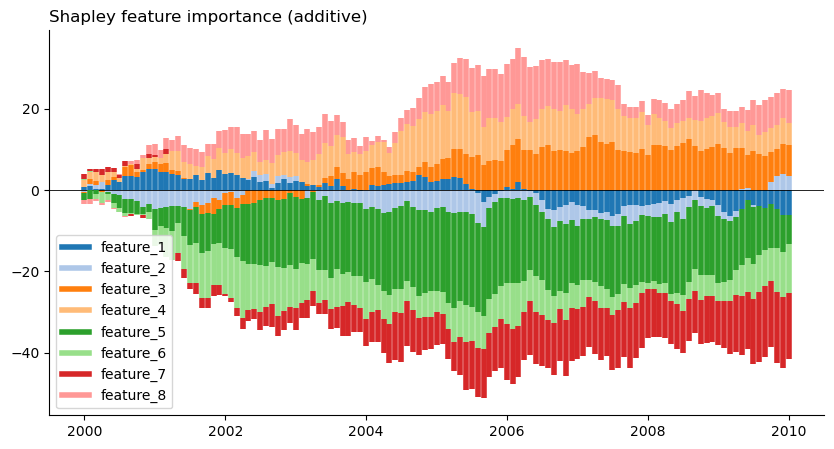

In [16]:
fig, ax = plt.subplots(figsize=[10,5])

for dt, fi in df_shap.T.items():
    v_pos = 0
    v_neg = 0

    for i, (key, val) in enumerate(fi.items()):
        c = colors[key]
        if val > 0:
            ax.plot([dt, dt], [v_pos, v_pos + val], zorder=-i, c=c, lw=4, solid_capstyle='butt')
            v_pos += val
        elif val < 0:
            ax.plot([dt, dt], [v_neg, v_neg + val], zorder=i, c=c, lw=4, solid_capstyle='butt')
            v_neg += val

for i, (key, val) in enumerate(fi.items()):
    c = colors[key]
    ax.plot(np.nan, np.nan, color=c, label=key, lw=4)
    
ax.axhline(0, lw=.6, c='k')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()
ax.set_title('Shapley feature importance (additive)', loc='left')

fig.savefig('plot.png')